In [5]:
import numpy as np
from matplotlib import pyplot as plt
import meangpuFunction as TeacherFunc
from sklearn.model_selection import train_test_split
import time
import random


dat = np.load('P2data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)  # (805, 19)
Y = dat[:, -1].reshape((-1,1))  # (805, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=16)

Top

In [6]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(644, 19) (161, 19) (644, 1) (161, 1)


In [7]:
Y_Copy = Y_train.astype(int)
Y_train_hot = TeacherFunc.onehot(Y_Copy)
Y_train_int = Y_train.astype(int)

In [8]:
import importlib
importlib.reload(TeacherFunc)

<module 'meangpuFunction' from 'c:\\Users\\meang\\Desktop\\ANNfinal\\ZeroToHeroP2\\meangpuFunction.py'>

MainLearn

LR: 0.4 || HU: 30 || epochs: 12081 || sample: 200
sample: 0
Time spent: 10.706401586532593
LR: 0.5 || HU: 20 || epochs: 9528 || sample: 200
sample: 1
Time spent: 4.475201845169067
LR: 1.9000000000000001 || HU: 26 || epochs: 12419 || sample: 200
sample: 2


C:\Users\meang\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
c:\Users\meang\Desktop\ANNfinal\ZeroToHeroP2\meangpuFunction.py:70: RuntimeWarning: invalid value encountered in multiply
  delta1 = np.dot(delta2, v) * H      # delta1: array N x M
c:\Users\meang\Desktop\ANNfinal\ZeroToHeroP2\meangpuFunction.py:35: RuntimeWarning: overflow encountered in square
  return np.mean((yp - y)**2)


Reach NaN. Terminated.
Time spent: 0.29006528854370117
LR: 1.2000000000000002 || HU: 28 || epochs: 12436 || sample: 200
sample: 3
Time spent: 10.816938877105713
LR: 0.1 || HU: 31 || epochs: 13548 || sample: 200
sample: 4
Time spent: 11.478575468063354
LR: 1.1 || HU: 30 || epochs: 9512 || sample: 200
sample: 5
Reach NaN. Terminated.
Time spent: 1.6673741340637207
LR: 1.3 || HU: 22 || epochs: 9678 || sample: 200
sample: 6
Time spent: 4.801947832107544
LR: 1.2000000000000002 || HU: 33 || epochs: 8229 || sample: 200
sample: 7
Time spent: 7.682778358459473
LR: 1.8 || HU: 24 || epochs: 9892 || sample: 200
sample: 8
Time spent: 7.966573238372803
LR: 0.9 || HU: 20 || epochs: 9082 || sample: 200
sample: 9
Time spent: 4.146931409835815
LR: 1.1 || HU: 27 || epochs: 8817 || sample: 200
sample: 10
Reach NaN. Terminated.
Time spent: 1.6373670101165771
LR: 0.6000000000000001 || HU: 22 || epochs: 8354 || sample: 200
sample: 11
Time spent: 4.251567840576172
LR: 1.7000000000000002 || HU: 34 || epochs: 1

Text(0.5, 1.0, 'plot for i 200 times')

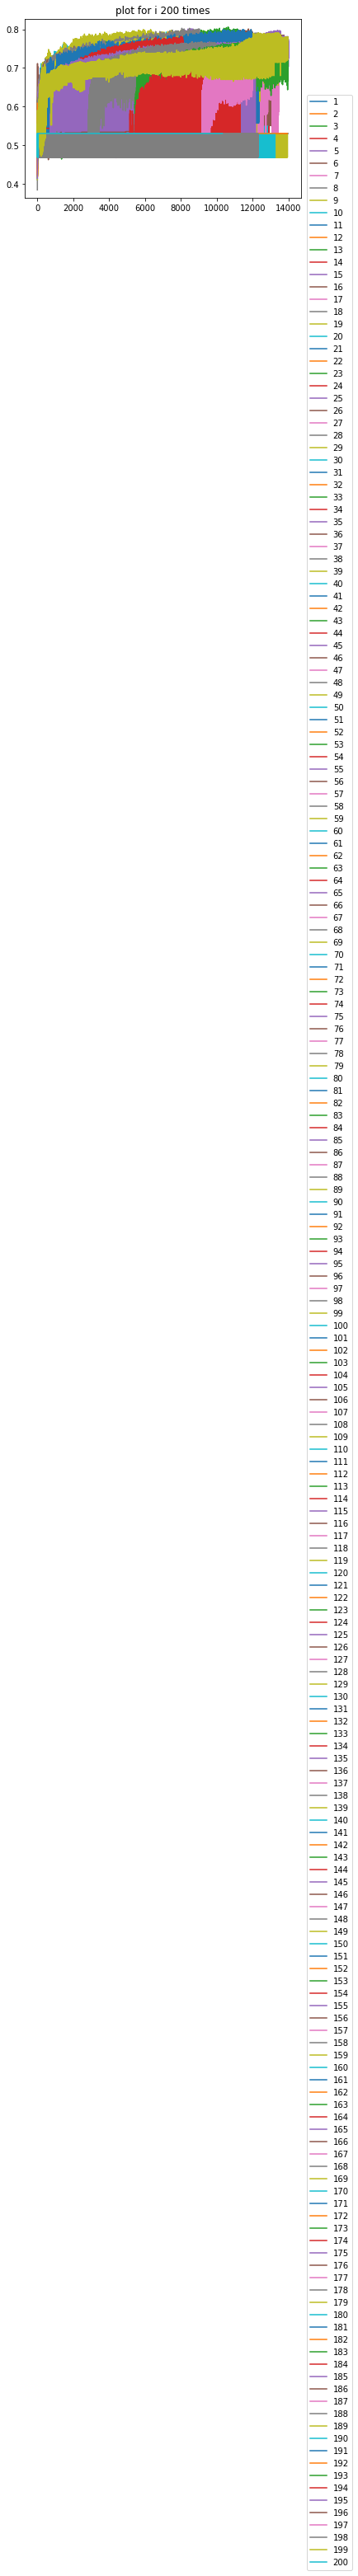

In [10]:
dat = np.load('P2data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)  # (805, 19)
Y = dat[:, -1].reshape((-1,1))  # (805, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.25, random_state=16)

Y_Copy = Y_train.astype(int)
Y_train_hot = TeacherFunc.onehot(Y_Copy)
Y_train_int = Y_train.astype(int)

N, D = X_train.shape  
_, K = Y_train_hot.shape  

sample = 200

all_accuracy_list = []
all_t1 = time.time()

for i in range(sample):

    HU = random.randint(20, 35)
    epochs = random.randint(8000, 14000)

    lrMul= 0.1 * random.randint(1, 20)

    print(f'LR: {lrMul} || HU: {HU} || epochs: {epochs} || sample: {sample}')

    

    lr1 = (1/N) * lrMul
    lr2 = (1/N) * lrMul

    print(f"sample: {i}")
    W1 = np.random.rand(HU, D) - 0.5  # w === make value between -0.5 to 0.5
    b1 = np.random.rand(HU, 1) - 0.5   # b === make value between -0.5 to 0.5
    W2 = np.random.rand(K, HU) - 0.5   # v === make value between -0.5 to 0.5
    b2 = np.random.rand(K, 1) - 0.5   # c === make value between -0.5 to 0.5

    t1 = time.time()
    cc, vv, bb, ww, train_loss, accuracy_end = TeacherFunc.train_mlp2(b2, W2, b1, W1, X_train, Y_train_hot, Y_train_int, lr1, lr2,
                                            epochs, TeacherFunc.identity, TeacherFunc.mse_loss)
    t2 = time.time()

    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}

    Yp = TeacherFunc.mlp2(cc, vv, bb, ww, X, TeacherFunc.softmax)
    realPredict = np.argmax(Yp, axis=1).reshape((-1,1))
    test_acc = np.mean(realPredict == Y)

    # Compute F-score
    eps = 1e-12
    TP = np.sum( (realPredict == 1)*(Y == 1) , axis=0).item()
    FP = np.sum( (realPredict == 1)*(Y == 0) , axis=0 ).item()
    FN = np.sum( (realPredict == 0)*(Y == 1) , axis=0 ).item()

    P = TP / (TP + FP + eps)
    R = TP / (TP + FN + eps)
    F = 2*P*R/(P +R + eps)


    # np.save(f'meangpuCollect/{F*100:.2f}-{accuracy_end[-1]:.4f}-{i}-{test_acc*100:.2f}', net)
    np.save(f'Helicopter/{F*100:.2f}-{accuracy_end[-1]+test_acc+F:.4f}-{accuracy_end[-1]:.4f}-{i}-{test_acc*100:.2f}', net)

    print('Time spent:', t2 - t1)
    all_accuracy_list.append(accuracy_end[-1])

    plt.plot(accuracy_end, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))

all_t2 = time.time()
formattedList = ["%.4f" % member for member in all_accuracy_list]
float_list = list(map(float, formattedList))
print()
print("All Accuracy")
print(float_list)
print(f"highest: {(np.max(float_list))*100}% || lowest: {(np.min(float_list))*100}%")
print("---------------------------------------------")
print(f'LR1: {lrMul} || LR2: {lrMul} || HU: {HU} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')
plt.title(f'plot for i {sample} times')


LearnEvolve

sample: 0
Time spent: 1.5005130767822266
sample: 1
Time spent: 1.5003974437713623
sample: 2
Time spent: 1.4923338890075684
sample: 3
Time spent: 1.497126579284668
sample: 4
Time spent: 1.4916324615478516
sample: 5
Time spent: 1.4887900352478027
sample: 6
Time spent: 1.5073370933532715
sample: 7
Time spent: 1.4933338165283203
sample: 8
Time spent: 1.5003349781036377
sample: 9
Time spent: 1.4963352680206299
sample: 10
Time spent: 1.4813311100006104
sample: 11
Time spent: 1.4863324165344238
sample: 12
Time spent: 1.4843320846557617
sample: 13
Time spent: 1.4833316802978516
sample: 14
Time spent: 1.4803314208984375
sample: 15
Time spent: 1.4843323230743408
sample: 16
Time spent: 1.4843313694000244
sample: 17
Time spent: 1.486332893371582
sample: 18
Time spent: 1.4943342208862305
sample: 19
Time spent: 1.499335527420044
sample: 20
Time spent: 1.5003352165222168
sample: 21
Time spent: 1.4963338375091553
sample: 22
Time spent: 1.5018434524536133
sample: 23
Time spent: 1.506115198135376
sample

KeyboardInterrupt: 

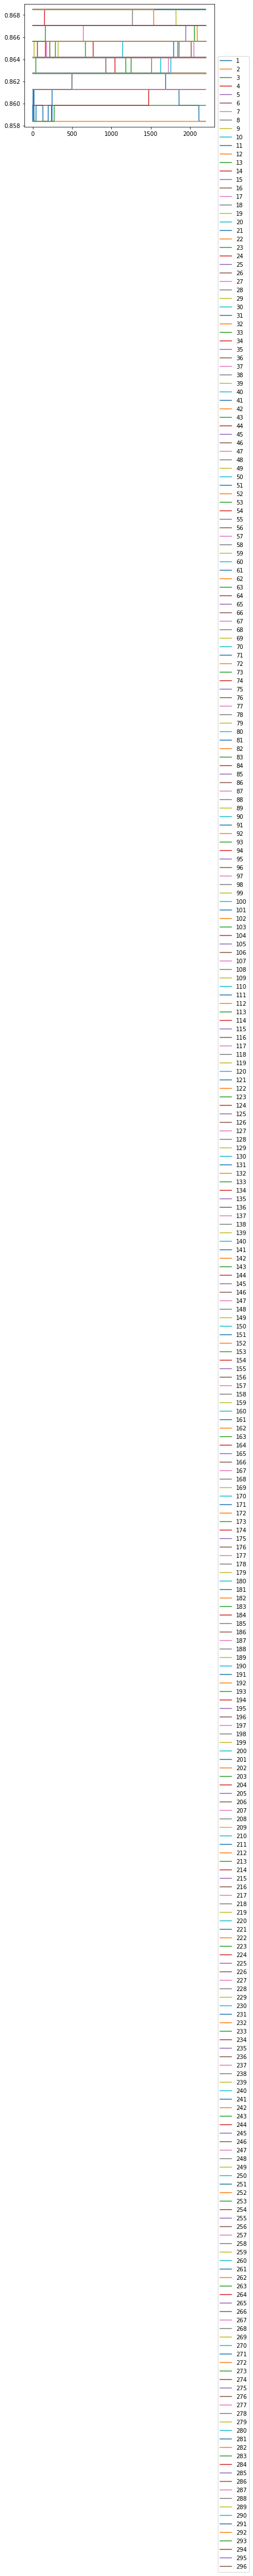

In [140]:
dat = np.load('P2data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)  # (805, 19)
Y = dat[:, -1].reshape((-1,1))  # (805, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.14, random_state=4)

Y_Copy = Y_train.astype(int)
Y_train_hot = TeacherFunc.onehot(Y_Copy)
Y_train_int = Y_train.astype(int)

N, D = X_train.shape  # (3440, 2)
_, K = Y_train_hot.shape  # (3440, 4)

HU = 30
epochs = 2200

lr1Mul= 0.01
lr2Mul= 0.01

sample = 450

lr1 = (1/N) * lr1Mul
lr2 = (1/N) * lr2Mul

all_accuracy_list = []
all_t1 = time.time()

loadData = "8651.npy"
loaded_net = np.load(loadData, allow_pickle=True).tolist()
loadCC, loadVV, loadBB, loadWW = loaded_net['c'], loaded_net['v'], loaded_net['b'], loaded_net['w']


for i in range(sample):
    print(f"sample: {i}")
    W1 = loaded_net['w']
    b1 = loaded_net['b']
    W2 = loaded_net['v']
    b2 = loaded_net['c']

    t1 = time.time()
    cc, vv, bb, ww, train_loss, accuracy_end = TeacherFunc.train_mlp2(b2, W2, b1, W1, X_train, Y_train_hot, Y_train_int, lr1, lr2,
                                            epochs, TeacherFunc.identity, TeacherFunc.mse_loss)
    t2 = time.time()

    net = {'c': cc, 'v': vv, 'b': bb, 'w': ww}

    #######################
    Yp = TeacherFunc.mlp2(cc, vv, bb, ww, X, TeacherFunc.softmax)
    realPredict = np.argmax(Yp, axis=1).reshape((-1,1))
    test_acc = np.mean(realPredict == Y)

    # Compute F-score
    eps = 1e-12
    TP = np.sum( (realPredict == 1)*(Y == 1) , axis=0).item()
    FP = np.sum( (realPredict == 1)*(Y == 0) , axis=0 ).item()
    FN = np.sum( (realPredict == 0)*(Y == 1) , axis=0 ).item()

    P = TP / (TP + FP + eps)
    R = TP / (TP + FN + eps)
    F = 2*P*R/(P +R + eps)


    np.save(f'meangpuCollect/{F*100:.2f}-{accuracy_end[-1]+test_acc+F:.4f}-{accuracy_end[-1]:.4f}-{i}-{test_acc*100:.2f}', net)

    print('Time spent:', t2 - t1)
    all_accuracy_list.append(accuracy_end[-1])

    plt.plot(accuracy_end, label=i+1)
    plt.legend(bbox_to_anchor=(1.2, 0.6))

all_t2 = time.time()
formattedList = ["%.4f" % member for member in all_accuracy_list]
float_list = list(map(float, formattedList))
print()
print("All Accuracy")
print(float_list)
print(f"highest: {(np.max(float_list))*100}% || lowest: {(np.min(float_list))*100}%")
print("---------------------------------------------")
print(f'LR1: {lr1Mul} || LR2: {lr2Mul} || HU: {HU} || epochs: {epochs} || sample: {sample}')
print(f"AVG accuracy = {(np.average(all_accuracy_list))*100:.2f}%")
print(f'Took {all_t2 - all_t1:.2f} seconds')
plt.title(f'plot for i {sample} times')


MainP222222222222

In [149]:
def P2_predict(x):
  """
  x: np.array of shape (N,D)
  return y: np.array of shape (N,1)
  """
  N, D = x.shape

  #   dataName = "meangpuCollect/0.7702-6-75.28.npy"
  dataName = "R7.npy"

  loaded_net = np.load(dataName, allow_pickle=True).tolist()
  
  yp = TeacherFunc.mlp2(loaded_net['c'], loaded_net['v'], 
          loaded_net['b'], loaded_net['w'], x, TeacherFunc.identity)


  realPredict = np.argmax(yp, axis=1).reshape((-1,1))

  # print(realPredict)

  return realPredict


In [150]:
dat = np.load('P2data.npy', allow_pickle=True)
X = dat[:,:-1].astype(float)
Y = dat[:, -1].reshape((-1,1))

pbin = P2_predict(X)

acc = np.mean(pbin == Y)
print('Accuracy = ', acc)

# Compute F-score
eps = 1e-12
TP = np.sum( (pbin == 1)*(Y == 1) , axis=0).item()
FP = np.sum( (pbin == 1)*(Y == 0) , axis=0 ).item()
FN = np.sum( (pbin == 0)*(Y == 1) , axis=0 ).item()

P = TP / (TP + FP + eps)
R = TP / (TP + FN + eps)
F = 2*P*R/(P +R + eps)

print('\nTest F-score, F = {:.4f}'.format(F))


Accuracy =  0.7863354037267081

Test F-score, F = 0.8193
